# Import libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import os
import cv2
import random
from shutil import copyfile

In [4]:
import numpy as np
import pandas as pd
import pickle

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

### Distribution of amount of images

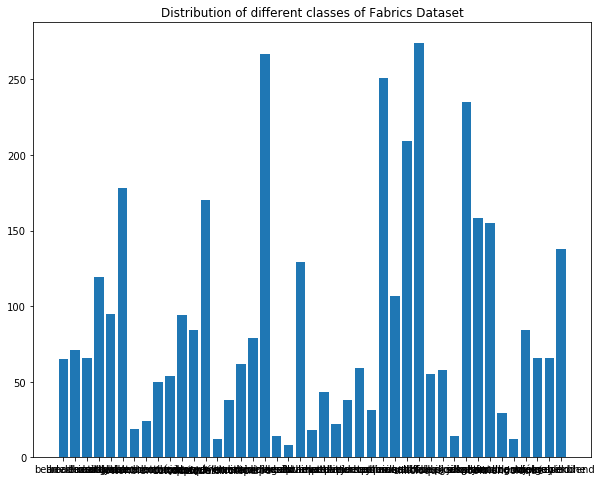

In [6]:
image_folder = ["beadedlace", "beadedsilk", "broderieanglaise", "chanitllylace", "cordedlace", "cottonblendbouclé", 
              "cottonblendbrocade", "cottonblendcloqué", "cottonembroidered", "cottonjersey", "cottonpiqué",
              "cottonvoile", "devorévelvet", "doublesilkcrêpe", "doublewoolcrêpe", "embroideredlace", "embroideredsilk",
              "embroideredtulle", "embroideredvelvet", "fur", "guipurelace", "heatstampedvelvet", "linenblend",
              "metallicjersey", "patternedcotton", "patternedlinen", "purecashmere", "purewool", "sequinnedtulle",
              "silkchiffon", "silkcloqué", "silkdupion", "silkfaillegrosgrain", "silkjersey", "silksatin",
              "silkshantung", "woolblendbouclé", "woolblendcloqué", "woolblendjersey", "woolcashmereblend",
              "woolcrepe", "woolgaberdine", "woolsilkblend"]
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir("fabrics/"+i+"/"))
    nimgs[i]=nimages
plt.figure(figsize=(10, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align="center")
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title("Distribution of different classes of Fabrics Dataset")
plt.show()

### Preprocess data and generate dataset

In [24]:
datadir = "fabrics"
categories = ["beadedlace", "beadedsilk", "broderieanglaise", "chanitllylace", "cordedlace", "cottonblendbouclé", 
              "cottonblendbrocade", "cottonblendcloqué", "cottonembroidered", "cottonjersey", "cottonpiqué",
              "cottonvoile", "devorévelvet", "doublesilkcrêpe", "doublewoolcrêpe", "embroideredlace", "embroideredsilk",
              "embroideredtulle", "embroideredvelvet", "fur", "guipurelace", "heatstampedvelvet", "linenblend",
              "metallicjersey", "patternedcotton", "patternedlinen", "purecashmere", "purewool", "sequinnedtulle",
              "silkchiffon", "silkcloqué", "silkdupion", "silkfaillegrosgrain", "silkjersey", "silksatin",
              "silkshantung", "woolblendbouclé", "woolblendcloqué", "woolblendjersey", "woolcashmereblend",
              "woolcrepe", "woolgaberdine", "woolsilkblend"]

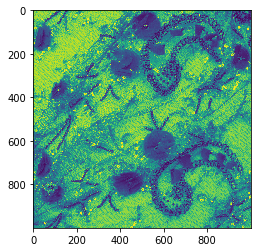

In [25]:
for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [26]:
print(img_array.shape)

(1000, 1000)


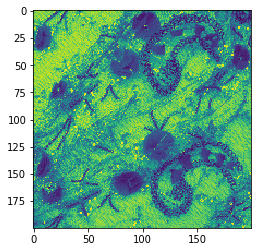

In [27]:
img_size = 200
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [28]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [29]:
print(len(training_data))

2846


In [30]:
random.shuffle(training_data)

In [31]:
for sample in training_data:
    print(sample[1])

42
29
34
29
35
23
20
32
31
20
20
22
6
34
17
3
0
27
27
34
29
35
17
34
20
25
35
26
29
40
27
17
4
34
42
29
3
42
27
33
8
42
31
40
9
27
42
3
20
29
31
27
24
27
41
3
17
41
18
28
31
20
15
42
27
17
39
24
39
1
20
24
9
15
34
3
29
17
11
17
27
23
16
20
24
35
34
24
27
11
3
29
17
28
35
40
34
29
35
41
1
0
2
17
42
11
3
4
29
38
21
34
27
35
2
22
42
34
19
3
42
1
15
21
17
1
41
17
17
28
42
0
16
35
11
31
42
34
27
29
3
28
17
8
17
27
9
27
27
18
29
4
40
31
16
29
27
22
3
34
27
35
41
40
17
23
28
27
4
34
32
16
34
28
11
25
9
27
4
34
9
17
24
34
21
23
16
4
27
1
3
34
3
32
1
32
15
35
35
17
1
40
34
20
32
34
39
31
3
34
34
27
27
15
27
9
15
3
32
15
27
27
29
27
17
11
2
35
39
42
3
17
35
20
29
22
17
9
42
29
35
29
17
17
42
29
27
1
29
39
35
2
31
22
16
3
22
24
9
28
35
2
26
2
15
38
17
29
35
19
25
28
4
34
32
34
9
31
17
17
41
9
22
27
1
39
24
3
6
3
42
34
4
29
3
20
40
0
17
17
16
29
35
39
17
3
16
28
17
22
29
32
17
17
27
28
42
20
17
29
31
40
39
35
29
34
19
35
39
17
39
42
3
20
27
27
35
4
3
3
8
17
0
22
31
27
24
28
17
28
17
28
42
29
27
3


In [14]:
X = []
y = []

In [15]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [16]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()